In [1]:
import pandas as pd

In [2]:
df3_WS1T = pd.read_csv("engineering_AS_segment2_workflowS4_has_duration.csv",engine='python')

In [3]:
df3_WS1T.head(n=1)

,CASE_ID,WRKFLW_TSK_MAP_GROUPED,WRKFLW_TSK_MAP_DETAILED,PATH_CRDATETIME,ITEM_CRUSER,WRKFLW_ORG_TYPE_CRUSER,STATUS_ORDER,LATEST_STATUS,WRKFLW_PROCESS,QUERY_PART,...,SPK_CAT_TYPE_CD,BROAD_COURSE_LEVEL,DEGREETYPE,LIABILITY_CATEGORY_CD_RECODE,ORIG_LIABILITY_CATEGORY_CD_RECODE,OFFER_RELEASED_FG,OFFER_OUTCOME_CD,OFFER_CONDITIONS,time_used_str,time_used_second
0,521428|372279|580506,Release Offer,Release Offer,2/8/2018 12:51:10,CHRISTINAA,Faculty,11,N,3b. Offer stage,Part 2 - Application Line ID Workflow,...,MCW,HDCW,Full Degree,AS,AS,Y,$ACC,Y,111 days 3 hours 46 minutes 28 seconds,9603988.0


In [4]:
#store unique WRKFLW_TSK_MAP_DETAILED
WRKFLW_TSK_MAP_DETAILED_list = df3_WS1T['WRKFLW_TSK_MAP_DETAILED'].tolist()
unique_WRKFLW_TSK_MAP_DETAILED_list = set(WRKFLW_TSK_MAP_DETAILED_list)
len(unique_WRKFLW_TSK_MAP_DETAILED_list)
unique_WRKFLW_TSK_MAP_DETAILED_list

{'AR - Reviewed - Official syllabus or subject descriptions (in English)',
 'AR - Satisfied - Further information (1)',
 'Accept',
 'Assessment Decision - No Decision',
 'Assessment Decision - Qualified',
 'Defer',
 'Manage Acceptance',
 'OC - Requested - English language requirements',
 'OC - Satisfied - Evidence of course completion',
 'Release Offer'}

In [5]:
#store unique CASE_ID
ID_list = df3_WS1T['CASE_ID'].tolist()
unique_ID_list = set(ID_list)
len(unique_ID_list)

23

In [6]:
#create dataframe columns->unique_WRKFLW_TSK_MAP_DETAILED row->unique_ID
df = pd.DataFrame(columns = unique_WRKFLW_TSK_MAP_DETAILED_list, index = unique_ID_list )
df

,Defer,Manage Acceptance,OC - Requested - English language requirements,AR - Reviewed - Official syllabus or subject descriptions (in English),Assessment Decision - Qualified,Assessment Decision - No Decision,Release Offer,Accept,AR - Satisfied - Further information (1),OC - Satisfied - Evidence of course completion
1045755|441165|681992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
841583|393054|611843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1102417|470238|722008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
556092|418746|649064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1156222|542251|829832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
831209|419422|650060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990545|323544|511318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
834063|417186|646721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
759141|363501|566737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1104975|473209|726228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#sotre id as key and workflow detail of the id as value into dictionary
from collections import defaultdict
ID_WRKFLW_dict = defaultdict(list)
for i, j in zip(df3_WS1T.CASE_ID,df3_WS1T.WRKFLW_TSK_MAP_DETAILED):
    ID_WRKFLW_dict[i].append(j)
len(ID_WRKFLW_dict)

23

In [8]:
#change the value
for key in ID_WRKFLW_dict.keys():
    for process in ID_WRKFLW_dict[key]:
            df.loc[key, process] = 1
zero_one_table = df.fillna(0)
zero_one_table

,Defer,Manage Acceptance,OC - Requested - English language requirements,AR - Reviewed - Official syllabus or subject descriptions (in English),Assessment Decision - Qualified,Assessment Decision - No Decision,Release Offer,Accept,AR - Satisfied - Further information (1),OC - Satisfied - Evidence of course completion
1045755|441165|681992,1,0,0,0,0,0,1,0,0,0
841583|393054|611843,0,0,0,0,0,0,1,1,0,0
1102417|470238|722008,0,0,0,0,0,0,1,1,0,0
556092|418746|649064,0,0,0,0,0,0,1,1,0,0
1156222|542251|829832,0,1,0,0,0,0,1,1,0,0
831209|419422|650060,0,0,0,0,0,0,1,1,0,0
990545|323544|511318,0,0,0,0,0,0,1,1,0,0
834063|417186|646721,0,0,0,0,0,0,1,1,0,0
759141|363501|566737,0,0,0,0,0,0,1,1,0,1
1104975|473209|726228,0,0,0,0,1,0,1,1,0,0


In [9]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

features= list(unique_WRKFLW_TSK_MAP_DETAILED_list)
print(len(features))
features.remove('Accept')
features.remove('Defer')
print(len(features))

X=zero_one_table[features]
y=zero_one_table ['Accept'] # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 70% training and 30% test

10
8


In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 8,
                             random_state = 0)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

In [12]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [13]:
print(confusion_matrix(y_test, clf_pred))
print(classification_report(y_test, clf_pred))

[[0 2]
 [0 4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.67      1.00      0.80         4

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6



/Users/ab0707/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# DOT data
from IPython.display import Image
from sklearn import tree
import pydotplus
fn=features
cn=['0', '1']
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=fn,
                                class_names=cn,filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

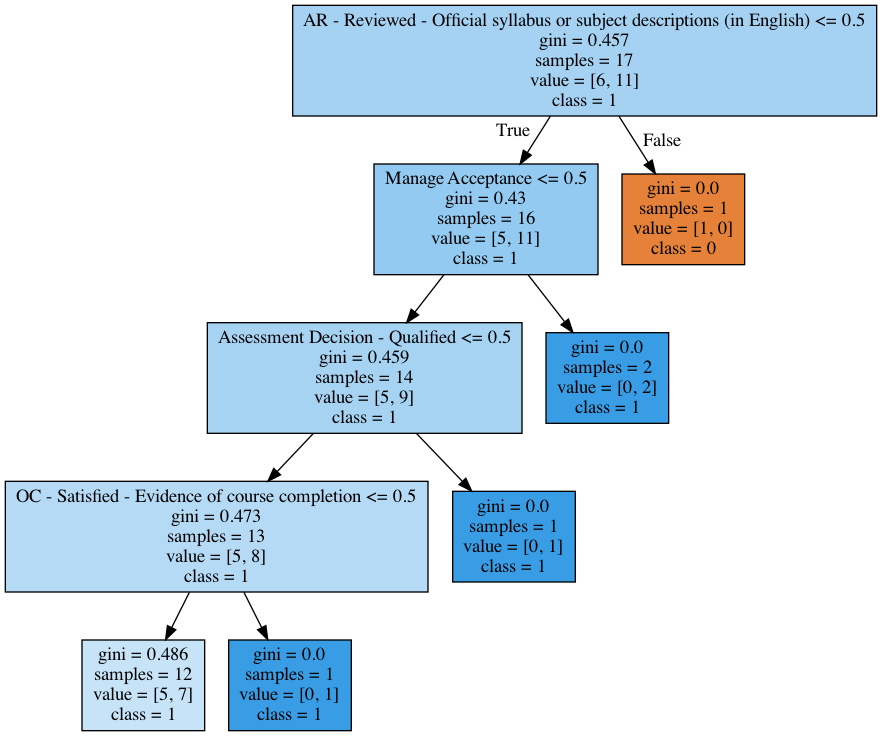

In [15]:
# Show graph
Image(graph.create_png())

In [16]:
# Create PNG
graph.write_png("engineering_AS_segment2_workflowS4_decisiontree.png")









True

In [17]:
zero_one_table['Accept'].value_counts()

1    15
0     8
Name: Accept, dtype: int64

In [18]:
from sklearn.utils import resample

# Separate majority and minority classes
zero_one_table_majority = df[zero_one_table['Accept']==1]
zero_one_table_minority = df[zero_one_table['Accept']==0]

# Upsample minority class
df_majority_downsampled = resample(zero_one_table_majority,
                                 replace=False,     # sample with replacement
                                 n_samples=8,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_downsampled = pd.concat([zero_one_table_minority, df_majority_downsampled])

# Display new class counts
df_downsampled = df_downsampled.fillna(0)
df_downsampled['Accept'].value_counts()

1    8
0    8
Name: Accept, dtype: int64

In [19]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df_downsampled[features]
y=df_downsampled ['Accept'] # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 70% training and 30% test

In [20]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 8,
                             random_state = 0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


In [21]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2 0]
 [1 1]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [22]:
# DOT data
from IPython.display import Image
from sklearn import tree
import pydotplus
fn=features
cn=['0', '1']
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=fn,
                                class_names=cn,filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

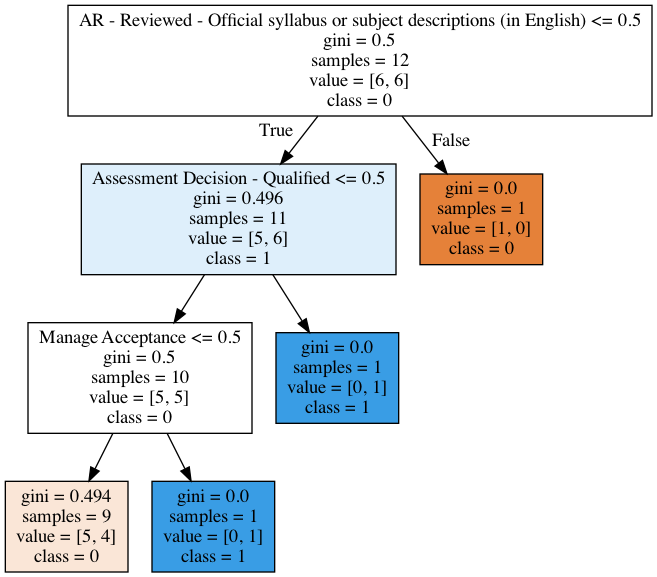

In [23]:
# Show graph
Image(graph.create_png())

In [24]:
# Create PNG
graph.write_png("engineering_AS_segment2_workflowS4_decisiontree_downsampled.png")

True